# IDEB geolocalized by school on Rio de Janeiro (RJ)
---

### Goals
Combining the school's IDEB (SAEB + approval rate) marks with Rio de Janeiro's municipal shapefile, we hope to discover some local standards in school performance over the years. The time interval we will analyze is from 2011 until today.

### Data sources

Shapefile:
- [Escolas Municipais - GeoOpenData - Cidade do Rio de Janeiro](http://hub.arcgis.com/datasets/PCRJ::escolas-municipais)


### Authors
*Original code by Guilherme Almeida [here](base_code.ipynb), adapted by [Fernanda Scovino](https://github.com/fernandascovino) - 2019.*

## Import required libraries

In [1]:
# Import config
import os
import sys
sys.path.insert(0, '../')
from config import RAW_PATH, TREAT_PATH, OUTPUT_PATH

# DATA ANALYSIS & VIZ TOOLS
from copy import deepcopy

import pandas as pd
pd.options.display.max_columns = 999

import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

%pylab inline
pylab.rcParams['figure.figsize'] = (12, 12)

# CONFIGS
#%reload_ext autoreload # for changes in .py
#%autoreload 2

#import warnings
#warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


## Import data

### [Shapefile: municipal schools in RJ](http://hub.arcgis.com/datasets/PCRJ::escolas-municipais)

In [2]:
os.listdir(RAW_PATH / 'shapefiles')

['Escolas%20Municipais']

In [3]:
map_municipio_rio = gpd.read_file(RAW_PATH / "shapefiles" / "Escolas%20Municipais", encoding = "latin1")

In [4]:
map_municipio_rio.head(3)

,SMEDBOEsco,SMEDBOEs_1,SMEDBOEs_2,SMEDBOEs_3,SMEDBOEs_4,SMEDBOEs_5,SMEDBOEs_6,SMEDBOEs_7,SMEDBOEs_8,SMEDBOEs_9,SMEDBOEs10,SMEDBOEs11,SMEDBOEs12,SMEDBOEs13,SMEDBOEs14,SMEDBOEs15,SMEDBOEs16,SMEDBOEs17,SMEDBOEs18,SMEDBOEs19,SMEDBOEs20,SMEDBOEs21,SMEDBOEs22,SMEDBOEs23,SMEDBOEs24,SMEDBOEs25,SMEDBOEs26,SMEDBOEs27,SMEDBOEs28,SMEDBOEs29,SMEDBOEs30,SMEDBOEs31,SMEDBOEs32,SMEDBOEs33,SMEDBOEs34,SMEDBODado,SMEDBODa_1,SMEDBODa_2,SMEDBODa_3,SMEDBODa_4,SMEDBODa_5,SMEDBODa_6,SMEDBODa_7,SMEDBODa_8,SMEDBODa_9,SMEDBODa10,SMEDBODa11,SMEDBODa12,SMEDBODa13,SMEDBODa14,SMEDBODa15,geometry
0,1124,016379,1026018,16379,33140111,Escola Municipal Emma D'Avila de Camillis,"Rua VÃ¡rzea de Palma, S/NÂºÂ Â",151,Guaratiba,10,1,3305-8970,N,"Lote13, Quadra 12, proximo a rua Materlandia",http://webapp.sme.rio.rj.gov.br/jcartela/publi...,None,1,2012-02-06T14:38:26.000Z,None,None,2013-01-22T21:15:53.000Z,None,0.0,None,None,{F17E15D7-E919-4160-9DF4-302ECEACB674},0.0,0.0,0,http://portalgeo.rio.rj.gov.br/bcoimagens/Educ...,0.0,None,1026018,EM Emma D'Avila de Camillis,10.27,1194.0,10,1026018,Escola Municipal Emma D'Avila de Camillis,{B4A18543-015E-43CF-9464-CBA85ADF5BAF},0.0,3.0,6.0,6.0,6.0,0.0,0.0,0.0,11.0,3.0,1026018,POINT (-43.63601828509798 -22.98632664816865)
1,1125,016387,1019060,16387,33140120,Escola Municipal Manoel Porto Filho,"Rua Pirapetinga, S/NÂºÂ Â",148,PaciÃªncia,10,1,3409-7579,N,"Entre as r. Para Sempre, Fulgor e Angulos Jubi...",http://webapp.sme.rio.rj.gov.br/jcartela/publi...,None,1,2012-02-06T14:38:26.000Z,None,None,2013-01-22T21:15:53.000Z,None,0.0,None,None,{78E667C0-39C7-4BF5-823C-01089E62CCFD},1.0,0.0,0,http://portalgeo.rio.rj.gov.br/bcoimagens/Educ...,1.0,None,1019060,EM Manoel Porto Filho,10.19,1108.0,10,1019060,Escola Municipal Manoel Porto Filho,{9073C806-C05E-4374-95FA-2BE52932C2E4},0.0,0.0,0.0,7.0,12.0,2.0,1.0,0.0,12.0,0.0,1019060,POINT (-43.63061141412631 -22.92095886212502)
2,1126,016386,1019059,16386,33140154,Escola Municipal Professor Jorge GonÃ§alves Fa...,"Av. CesÃ¡rio de Melo, S/NÂº - Conjunto CesarÃ£...",149,Santa Cruz,10,1,3401-6867,N,"Entre as ruas 13, Av. Canal 1 e Av. Cesario de...",http://webapp.sme.rio.rj.gov.br/jcartela/publi...,None,1,2012-02-06T14:38:26.000Z,None,None,2013-01-22T21:15:53.000Z,None,0.0,None,None,{A994E09E-471D-4447-B7F1-589B3D452260},0.0,0.0,0,http://portalgeo.rio.rj.gov.br/bcoimagens/Educ...,1.0,None,1019059,EM ProfÂ° Jorge GonÃ§alves Farinha,10.16,1107.0,10,1019059,Escola Municipal Professor Jorge GonÃ§alves Fa...,{9C5CC4B1-F37F-4490-A35E-7C89E7CF21C4},0.0,8.0,11.0,5.0,0.0,2.0,0.0,0.0,12.0,8.0,1019059,POINT (-43.65817006396811 -22.93248534941013)


In [5]:
map_municipio_rio.shape

(1541, 52)

In [6]:
map_municipio_rio.columns

Index(['SMEDBOEsco', 'SMEDBOEs_1', 'SMEDBOEs_2', 'SMEDBOEs_3', 'SMEDBOEs_4',
       'SMEDBOEs_5', 'SMEDBOEs_6', 'SMEDBOEs_7', 'SMEDBOEs_8', 'SMEDBOEs_9',
       'SMEDBOEs10', 'SMEDBOEs11', 'SMEDBOEs12', 'SMEDBOEs13', 'SMEDBOEs14',
       'SMEDBOEs15', 'SMEDBOEs16', 'SMEDBOEs17', 'SMEDBOEs18', 'SMEDBOEs19',
       'SMEDBOEs20', 'SMEDBOEs21', 'SMEDBOEs22', 'SMEDBOEs23', 'SMEDBOEs24',
       'SMEDBOEs25', 'SMEDBOEs26', 'SMEDBOEs27', 'SMEDBOEs28', 'SMEDBOEs29',
       'SMEDBOEs30', 'SMEDBOEs31', 'SMEDBOEs32', 'SMEDBOEs33', 'SMEDBOEs34',
       'SMEDBODado', 'SMEDBODa_1', 'SMEDBODa_2', 'SMEDBODa_3', 'SMEDBODa_4',
       'SMEDBODa_5', 'SMEDBODa_6', 'SMEDBODa_7', 'SMEDBODa_8', 'SMEDBODa_9',
       'SMEDBODa10', 'SMEDBODa11', 'SMEDBODa12', 'SMEDBODa13', 'SMEDBODa14',
       'SMEDBODa15', 'geometry'],
      dtype='object')

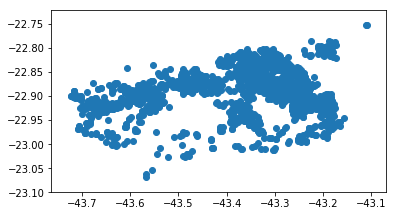

In [7]:
map_municipio_rio.plot()

### [IDEB: municipal schools in Rio de Janeiro](http://portal.inep.gov.br/web/guest/educacao-basica/ideb/resultados)

> ### O que é o Ideb
>O Índice de Desenvolvimento da Educação Básica (Ideb) foi criado em 2007 e reúne, em um só indicador, os resultados de dois conceitos igualmente importantes para a qualidade da educação: o fluxo escolar e as médias de desempenho nas avaliações.
>
> Ele é calculado a partir dos dados sobre **aprovação escolar, obtidos no Censo Escolar**, e das médias de desempenho nas avaliações do Inep, o **Sistema de Avaliação da Educação Básica (Saeb) – para as unidades da federação** e para o país, e a Prova Brasil – para os municípios.


* [How IDEB is calculated](http://download.inep.gov.br/educacao_basica/portal_ideb/o_que_e_o_ideb/Nota_Tecnica_n1_concepcaoIDEB.pdf)

All the data that is used to calculate IDEB and the indicaator itself can be downloaded [here](http://portal.inep.gov.br/web/guest/educacao-basica/ideb/resultados). It has multiple levels of aggregations you can choose, from country level (macro) to school level (micro). 

We will use the data from schools level, and only the first years (primary education), that can be found on the website in `Planilhas do Ideb > Escolas > Ensino Fundamental Regular - Anos Iniciais`.

#### You can jump direct to [here](#ideb_rj)!

In this section, we treat the raw data and filter only the municipal schools in Rio de Janeiro. The new taable is saved in `DATA_PATH`

In [8]:
os.listdir(RAW_PATH / 'ideb')

['divulgacao_anos_iniciais-escolas-2017.xlsx']

In [9]:
ideb_geral = pd.read_excel(RAW_PATH / 'ideb' / 'divulgacao_anos_iniciais-escolas-2017.xlsx', 
                           encoding = "latin1", skiprows=4)

In [10]:
ideb_geral.head()

,Sigla da UF,Código do Município,Nome do Município,Código da Escola,Nome da Escola,Rede,Taxa de Aprovação - 2005,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Taxa de Aprovação - 2007,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Taxa de Aprovação - 2009,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Taxa de Aprovação - 2011,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Taxa de Aprovação - 2013,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Taxa de Aprovação - 2015,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Taxa de Aprovação - 2017,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Nota SAEB - 2005,Unnamed: 56,Unnamed: 57,Nota SAEB - 2007,Unnamed: 59,Unnamed: 60,Nota SAEB - 2009,Unnamed: 62,Unnamed: 63,Nota SAEB - 2011,Unnamed: 65,Unnamed: 66,Nota SAEB - 2013,Unnamed: 68,Unnamed: 69,Nota SAEB - 2015,Unnamed: 71,Unnamed: 72,Nota SAEB - 2017,Unnamed: 74,Unnamed: 75,IDEB 2005 (N x P),IDEB 2007 (N x P),IDEB 2009 (N x P),IDEB 2011 (N x P),IDEB 2013 (N x P),IDEB 2015 (N x P),IDEB 2017 (N x P),Projeções,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Matemática,Língua Portuguesa,Nota Média Padronizada (N),Matemática,Língua Portuguesa,Nota Média Padronizada (N),Matemática,Língua Portuguesa,Nota Média Padronizada (N),Matemática,Língua Portuguesa,Nota Média Padronizada (N),Matemática,Língua Portuguesa,Nota Média Padronizada (N),Matemática,Língua Portuguesa,Nota Média Padronizada (N),Matemática,Língua Portuguesa,Nota Média Padronizada (N),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,1º ao 5º ano,1º,2º,3º,4º,5º,Indicador de Rendimento (P),1º ao 5º ano,1º,2º,3º,4º,5º,Indicador de Rendimento (P),1º ao 5º ano,1º,2º,3º,4º,5º,Indicador de Rendimento (P),1º ao 5º ano,1º,2º,3º,4º,5º,Indicador de Rendimento (P),1º ao 5º ano,1º,2º,3º,4º,5º,Indicador de Rendimento (P),1º ao 5º ano,1º,2º,3º,4º,5º,Indicador de Rendimento (P),1º ao 5º ano,1º,2º,3º,4º,5º,Indicador de Rendimento (P),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007,2009,2011,2013,2015,2017,2019,2021
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RO,1100015.0,Alta Floresta D'Oeste,11024666.0,EMEIEF BOA ESPERANCA,Municipal,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,97.9,100,100,100,100,90,0.978261,97.4,100,100,100,94.1,95.8,0.979136,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,209.26,193.66,5.47866,224.05,191.78,5.72673,-,-,-,-,-,5.4,5.6,-,-,-,-,-,5.6,5.9,6.1
4,RO,1100015.0,Alta Floresta D'Oeste,11024682.0,EEEF EURIDICE LOPES PEDROSO,Estadual,93.1,-,100,93.7,93,91,0.943084,92,100,100,87.9,93.6,92.2,0.945067,89,100,100,74.5,86.2,92.3,0.895127,92.6,100,97.7,81.6,92.2,93.3,0.924994,93.1,98,97.3,83,90.6,96.7,0.927497,94.7,100,98.8,86,91.1,98.8,0.946114,95.5,-,-,93.2,94,98.7,0.952392,181.551,164.825,4.42558,185.03,166.87,4.52916,202.34,174.8,5.00368,211.93,173.05,5.15488,219.46,201.27,5.81168,227.07,210.35,6.122,256.25,244.34,7.29687,4.2,4.3,4.5,4.8,5.4,5.8,6.9,4.2,4.6,5,5.3,5.5,5.8,6.1,6.3


#### Treat columns

In [11]:
cols = ideb_geral.columns
cols

Index(['Sigla da UF', 'Código do Município', 'Nome do Município',
       'Código da Escola', 'Nome da Escola', 'Rede',
       'Taxa de Aprovação - 2005', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Taxa de Aprovação - 2007',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Taxa de Aprovação - 2009', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Taxa de Aprovação - 2011', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Taxa de Aprovação - 2013', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Taxa de Aprovação - 2015',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
       'Unnamed: 46', 'Unnamed: 47', 'Taxa de Aprovação - 2017', 'Unnamed: 49',
       'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unn

In [12]:
new_cols_name = ['sigla_uf', 'cod_municipio', 'nome_municipio', 'cod_escola', 'nome_escola', 'rede']

In [13]:
anos = [2005 + 2*i for i in range(7)]
anos

[2005, 2007, 2009, 2011, 2013, 2015, 2017]

In [14]:
taxa = ['taxa_aprovacao_{}_{}'.format(ano, serie) for ano in anos for serie in ['todos']+list(range(1,6))+['indicador']]
taxa

['taxa_aprovacao_2005_todos',
 'taxa_aprovacao_2005_1',
 'taxa_aprovacao_2005_2',
 'taxa_aprovacao_2005_3',
 'taxa_aprovacao_2005_4',
 'taxa_aprovacao_2005_5',
 'taxa_aprovacao_2005_indicador',
 'taxa_aprovacao_2007_todos',
 'taxa_aprovacao_2007_1',
 'taxa_aprovacao_2007_2',
 'taxa_aprovacao_2007_3',
 'taxa_aprovacao_2007_4',
 'taxa_aprovacao_2007_5',
 'taxa_aprovacao_2007_indicador',
 'taxa_aprovacao_2009_todos',
 'taxa_aprovacao_2009_1',
 'taxa_aprovacao_2009_2',
 'taxa_aprovacao_2009_3',
 'taxa_aprovacao_2009_4',
 'taxa_aprovacao_2009_5',
 'taxa_aprovacao_2009_indicador',
 'taxa_aprovacao_2011_todos',
 'taxa_aprovacao_2011_1',
 'taxa_aprovacao_2011_2',
 'taxa_aprovacao_2011_3',
 'taxa_aprovacao_2011_4',
 'taxa_aprovacao_2011_5',
 'taxa_aprovacao_2011_indicador',
 'taxa_aprovacao_2013_todos',
 'taxa_aprovacao_2013_1',
 'taxa_aprovacao_2013_2',
 'taxa_aprovacao_2013_3',
 'taxa_aprovacao_2013_4',
 'taxa_aprovacao_2013_5',
 'taxa_aprovacao_2013_indicador',
 'taxa_aprovacao_2015_todos',


In [15]:
new_cols_name  = new_cols_name  + taxa
len(new_cols_name)

55

In [16]:
saeb = ['saeb_{}_{}'.format(ano, mod) for ano in anos for mod in ['mat', 'pt', 'media_padrao']]
saeb

['saeb_2005_mat',
 'saeb_2005_pt',
 'saeb_2005_media_padrao',
 'saeb_2007_mat',
 'saeb_2007_pt',
 'saeb_2007_media_padrao',
 'saeb_2009_mat',
 'saeb_2009_pt',
 'saeb_2009_media_padrao',
 'saeb_2011_mat',
 'saeb_2011_pt',
 'saeb_2011_media_padrao',
 'saeb_2013_mat',
 'saeb_2013_pt',
 'saeb_2013_media_padrao',
 'saeb_2015_mat',
 'saeb_2015_pt',
 'saeb_2015_media_padrao',
 'saeb_2017_mat',
 'saeb_2017_pt',
 'saeb_2017_media_padrao']

In [17]:
new_cols_name  = new_cols_name + saeb
len(new_cols_name)

76

In [18]:
ideb = ['ideb_{}'.format(ano) for ano in anos]
ideb

['ideb_2005',
 'ideb_2007',
 'ideb_2009',
 'ideb_2011',
 'ideb_2013',
 'ideb_2015',
 'ideb_2017']

In [19]:
new_cols_name  = new_cols_name + ideb
len(new_cols_name)

83

In [20]:
projecoes = ['projecoes_{}'.format(ano) for ano in anos[1:]+['2019', '2021']]
projecoes

['projecoes_2007',
 'projecoes_2009',
 'projecoes_2011',
 'projecoes_2013',
 'projecoes_2015',
 'projecoes_2017',
 'projecoes_2019',
 'projecoes_2021']

In [21]:
new_cols_name  = new_cols_name + projecoes
len(new_cols_name)

91

In [22]:
len(cols)

91

In [23]:
ideb_dic_cols = dict(zip(new_cols_name, cols))
ideb_dic_cols

{'sigla_uf': 'Sigla da UF',
 'cod_municipio': 'Código do Município',
 'nome_municipio': 'Nome do Município',
 'cod_escola': 'Código da Escola',
 'nome_escola': 'Nome da Escola',
 'rede': 'Rede',
 'taxa_aprovacao_2005_todos': 'Taxa de Aprovação - 2005',
 'taxa_aprovacao_2005_1': 'Unnamed: 7',
 'taxa_aprovacao_2005_2': 'Unnamed: 8',
 'taxa_aprovacao_2005_3': 'Unnamed: 9',
 'taxa_aprovacao_2005_4': 'Unnamed: 10',
 'taxa_aprovacao_2005_5': 'Unnamed: 11',
 'taxa_aprovacao_2005_indicador': 'Unnamed: 12',
 'taxa_aprovacao_2007_todos': 'Taxa de Aprovação - 2007',
 'taxa_aprovacao_2007_1': 'Unnamed: 14',
 'taxa_aprovacao_2007_2': 'Unnamed: 15',
 'taxa_aprovacao_2007_3': 'Unnamed: 16',
 'taxa_aprovacao_2007_4': 'Unnamed: 17',
 'taxa_aprovacao_2007_5': 'Unnamed: 18',
 'taxa_aprovacao_2007_indicador': 'Unnamed: 19',
 'taxa_aprovacao_2009_todos': 'Taxa de Aprovação - 2009',
 'taxa_aprovacao_2009_1': 'Unnamed: 21',
 'taxa_aprovacao_2009_2': 'Unnamed: 22',
 'taxa_aprovacao_2009_3': 'Unnamed: 23',
 't

In [24]:
# Rename cols treated and drop old ones
ideb_geral.columns = ideb_dic_cols.keys()
ideb_geral = ideb_geral.drop([0,1,2], axis='index')
ideb_geral.head()

,sigla_uf,cod_municipio,nome_municipio,cod_escola,nome_escola,rede,taxa_aprovacao_2005_todos,taxa_aprovacao_2005_1,taxa_aprovacao_2005_2,taxa_aprovacao_2005_3,taxa_aprovacao_2005_4,taxa_aprovacao_2005_5,taxa_aprovacao_2005_indicador,taxa_aprovacao_2007_todos,taxa_aprovacao_2007_1,taxa_aprovacao_2007_2,taxa_aprovacao_2007_3,taxa_aprovacao_2007_4,taxa_aprovacao_2007_5,taxa_aprovacao_2007_indicador,taxa_aprovacao_2009_todos,taxa_aprovacao_2009_1,taxa_aprovacao_2009_2,taxa_aprovacao_2009_3,taxa_aprovacao_2009_4,taxa_aprovacao_2009_5,taxa_aprovacao_2009_indicador,taxa_aprovacao_2011_todos,taxa_aprovacao_2011_1,taxa_aprovacao_2011_2,taxa_aprovacao_2011_3,taxa_aprovacao_2011_4,taxa_aprovacao_2011_5,taxa_aprovacao_2011_indicador,taxa_aprovacao_2013_todos,taxa_aprovacao_2013_1,taxa_aprovacao_2013_2,taxa_aprovacao_2013_3,taxa_aprovacao_2013_4,taxa_aprovacao_2013_5,taxa_aprovacao_2013_indicador,taxa_aprovacao_2015_todos,taxa_aprovacao_2015_1,taxa_aprovacao_2015_2,taxa_aprovacao_2015_3,taxa_aprovacao_2015_4,taxa_aprovacao_2015_5,taxa_aprovacao_2015_indicador,taxa_aprovacao_2017_todos,taxa_aprovacao_2017_1,taxa_aprovacao_2017_2,taxa_aprovacao_2017_3,taxa_aprovacao_2017_4,taxa_aprovacao_2017_5,taxa_aprovacao_2017_indicador,saeb_2005_mat,saeb_2005_pt,saeb_2005_media_padrao,saeb_2007_mat,saeb_2007_pt,saeb_2007_media_padrao,saeb_2009_mat,saeb_2009_pt,saeb_2009_media_padrao,saeb_2011_mat,saeb_2011_pt,saeb_2011_media_padrao,saeb_2013_mat,saeb_2013_pt,saeb_2013_media_padrao,saeb_2015_mat,saeb_2015_pt,saeb_2015_media_padrao,saeb_2017_mat,saeb_2017_pt,saeb_2017_media_padrao,ideb_2005,ideb_2007,ideb_2009,ideb_2011,ideb_2013,ideb_2015,ideb_2017,projecoes_2007,projecoes_2009,projecoes_2011,projecoes_2013,projecoes_2015,projecoes_2017,projecoes_2019,projecoes_2021
3,RO,1100015.0,Alta Floresta D'Oeste,11024666.0,EMEIEF BOA ESPERANCA,Municipal,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,97.9,100,100,100,100,90,0.978261,97.4,100,100,100,94.1,95.8,0.979136,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,209.26,193.66,5.47866,224.05,191.78,5.72673,-,-,-,-,-,5.4,5.6,-,-,-,-,-,5.6,5.9,6.1
4,RO,1100015.0,Alta Floresta D'Oeste,11024682.0,EEEF EURIDICE LOPES PEDROSO,Estadual,93.1,-,100,93.7,93,91,0.943084,92,100,100,87.9,93.6,92.2,0.945067,89,100,100,74.5,86.2,92.3,0.895127,92.6,100,97.7,81.6,92.2,93.3,0.924994,93.1,98,97.3,83,90.6,96.7,0.927497,94.7,100,98.8,86,91.1,98.8,0.946114,95.5,-,-,93.2,94,98.7,0.952392,181.551,164.825,4.42558,185.03,166.87,4.52916,202.34,174.8,5.00368,211.93,173.05,5.15488,219.46,201.27,5.81168,227.07,210.35,6.122,256.25,244.34,7.29687,4.2,4.3,4.5,4.8,5.4,5.8,6.9,4.2,4.6,5,5.3,5.5,5.8,6.1,6.3
5,RO,1100015.0,Alta Floresta D'Oeste,11024828.0,EMEIEF IZIDORO STEDILE,Municipal,-,-,-,-,-,-,-,-,-,-,-,-,-,-,84.4,96,85.7,25,79.4,88,0.581102,91.2,96.4,83.9,96.2,85.7,100,0.919861,85.7,94.7,68,85.3,88.2,95.8,0.850844,97.8,100,100,100,96,92.9,0.976926,94.3,100,100,100,88.6,90,0.954239,-,-,-,-,-,-,194.63,157.09,4.53455,-,-,-,-,-,-,208.37,177.01,5.15894,202.24,183.98,5.16869,-,-,2.6,-,-,5,4.9,-,-,3.2,3.5,3.8,4.1,4.4,4.7
6,RO,1100015.0,Alta Floresta D'Oeste,11024968.0,EEEFM JUSCELINO KUBITSCHEK DE OLIVEIRA,Estadual,89.4,-,100,82.9,88.1,90.1,0.898629,94.3,-,100,80,94,98.4,0.923768,93.4,95.8,100,58.8,95,98.3,0.859927,85.6,100,100,81.4,83.3,75,0.867707,93.1,-,100,100,98.1,84.7,0.95238,91.6,-,-,-,93.1,90.9,0.919868,-,-,-,-,-,-,-,198.774,177.659,4.9876,204.11,180.41,5.13946,211.58,188.54,5.42984,209.4,173.47,5.11424,233.84,213.73,6.31265,236.2,218.29,6.4406,-,-,-,4.5,4.7,4.7,4.4,6,5.9,-,4.5,4.9,5.3,5.5,5.8,6.1,6.3,6.6
7,RO,1100015.0,Alta Floresta D'Oeste,11025077.0,EMEIEF MARIA DE SOUZA PEGO,Municipal,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,85.9,100,70,100,81.8,87.5,0.862973,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,201,195.11,5.34739,-,-,-,-,-,-,4.6,-,-,-,-,-,-,4.9,5.2


In [25]:
# Identifying INEP notes at the end of df
ideb_geral.tail()

,sigla_uf,cod_municipio,nome_municipio,cod_escola,nome_escola,rede,taxa_aprovacao_2005_todos,taxa_aprovacao_2005_1,taxa_aprovacao_2005_2,taxa_aprovacao_2005_3,taxa_aprovacao_2005_4,taxa_aprovacao_2005_5,taxa_aprovacao_2005_indicador,taxa_aprovacao_2007_todos,taxa_aprovacao_2007_1,taxa_aprovacao_2007_2,taxa_aprovacao_2007_3,taxa_aprovacao_2007_4,taxa_aprovacao_2007_5,taxa_aprovacao_2007_indicador,taxa_aprovacao_2009_todos,taxa_aprovacao_2009_1,taxa_aprovacao_2009_2,taxa_aprovacao_2009_3,taxa_aprovacao_2009_4,taxa_aprovacao_2009_5,taxa_aprovacao_2009_indicador,taxa_aprovacao_2011_todos,taxa_aprovacao_2011_1,taxa_aprovacao_2011_2,taxa_aprovacao_2011_3,taxa_aprovacao_2011_4,taxa_aprovacao_2011_5,taxa_aprovacao_2011_indicador,taxa_aprovacao_2013_todos,taxa_aprovacao_2013_1,taxa_aprovacao_2013_2,taxa_aprovacao_2013_3,taxa_aprovacao_2013_4,taxa_aprovacao_2013_5,taxa_aprovacao_2013_indicador,taxa_aprovacao_2015_todos,taxa_aprovacao_2015_1,taxa_aprovacao_2015_2,taxa_aprovacao_2015_3,taxa_aprovacao_2015_4,taxa_aprovacao_2015_5,taxa_aprovacao_2015_indicador,taxa_aprovacao_2017_todos,taxa_aprovacao_2017_1,taxa_aprovacao_2017_2,taxa_aprovacao_2017_3,taxa_aprovacao_2017_4,taxa_aprovacao_2017_5,taxa_aprovacao_2017_indicador,saeb_2005_mat,saeb_2005_pt,saeb_2005_media_padrao,saeb_2007_mat,saeb_2007_pt,saeb_2007_media_padrao,saeb_2009_mat,saeb_2009_pt,saeb_2009_media_padrao,saeb_2011_mat,saeb_2011_pt,saeb_2011_media_padrao,saeb_2013_mat,saeb_2013_pt,saeb_2013_media_padrao,saeb_2015_mat,saeb_2015_pt,saeb_2015_media_padrao,saeb_2017_mat,saeb_2017_pt,saeb_2017_media_padrao,ideb_2005,ideb_2007,ideb_2009,ideb_2011,ideb_2013,ideb_2015,ideb_2017,projecoes_2007,projecoes_2009,projecoes_2011,projecoes_2013,projecoes_2015,projecoes_2017,projecoes_2019,projecoes_2021
59923,DF,5300108.0,Brasília,53068220.0,EC DOM BOSCO,Estadual,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,78.1,-,-,-,80.1,77,0.785194,89,95.1,96,76.1,89.4,89.5,0.886032,88.8,93.1,92.9,79.2,100,73.6,0.866272,93.2,97,98.3,85,100,86.5,0.929236,-,-,-,-,-,-,-,-,-,219.05,198.56,5.75458,219.78,206.93,5.92069,220.4,207.18,5.93707,235.16,224.2,6.5282,-,-,-,4.5,5.2,5.1,6.1,-,-,-,4.8,5.1,5.3,5.6,5.9
59924,DF,5300108.0,Brasília,53068238.0,EC VILA BURITIS,Estadual,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,92.2,99.1,99.5,85,89.5,92.2,0.927215,95.6,100,99.3,89.7,99.5,92.2,0.959417,90.4,96.5,98.7,83.3,84.4,92,0.905516,95.2,100,100,87,99.5,93.4,0.956917,-,-,-,-,-,-,-,-,-,212.63,196.37,5.59224,206.86,191.46,5.39285,216.78,211.69,5.94998,214.73,206.98,5.82523,-,-,-,5.2,5.2,5.4,5.6,-,-,-,5.4,5.7,6,6.2,6.4
59925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59926,Fonte: MEC/Inep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59927,Notas: ND - Número de participantes no SAEB in...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
notas = ideb_geral['sigla_uf'][59927]
notas

'Notas: ND - Número de participantes no SAEB insuficiente para que os resultados sejam divulgados.\n           ND* - Solicitação de não divulgação conforme Portaria Inep nº 410 de 03 de novembro de 2011 ou Portaria Inep nº 304 de 24 de junho de 2013.\n           ND** - Não divulgado por solicitação da Secretaria/Escola por situações adversas no momento da aplicação do SAEB 2013.\n           (*) - Média calculada a partir dos resultados dos alunos nas avaliações estaduais, em decorrência do extravio de provas e impossibilidade do cálculo da proficiência para o SAEB.'

In [27]:
# Drop INEP notes from df
ideb_geral = ideb_geral.drop([59925, 59926, 59927], axis='index')

In [28]:
ideb_geral.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59922 entries, 3 to 59924
Data columns (total 91 columns):
sigla_uf                         59922 non-null object
cod_municipio                    59922 non-null float64
nome_municipio                   59922 non-null object
cod_escola                       59922 non-null float64
nome_escola                      59922 non-null object
rede                             59922 non-null object
taxa_aprovacao_2005_todos        59922 non-null object
taxa_aprovacao_2005_1            59922 non-null object
taxa_aprovacao_2005_2            59922 non-null object
taxa_aprovacao_2005_3            59922 non-null object
taxa_aprovacao_2005_4            59922 non-null object
taxa_aprovacao_2005_5            59922 non-null object
taxa_aprovacao_2005_indicador    59922 non-null object
taxa_aprovacao_2007_todos        59922 non-null object
taxa_aprovacao_2007_1            59922 non-null object
taxa_aprovacao_2007_2            59922 non-null object
taxa_apro

In [29]:
ideb_geral.sigla_uf.unique()

array(['RO', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO', 'MA', 'PI', 'CE', 'RN',
       'PB', 'PE', 'AL', 'SE', 'BA', 'MG', 'ES', 'RJ', 'SP', 'PR', 'SC',
       'RS', 'MS', 'MT', 'GO', 'DF'], dtype=object)

In [30]:
ideb_geral.rede.unique()

array(['Municipal', 'Estadual', 'Federal'], dtype=object)

<a id=ideb_rj></a>
#### Filter municipal schools in Rio de Janeiro

In [31]:
#ideb_rj.to_csv(TREAT_PATH / 'ideb_rj.csv')
#ideb_rj = ideb_geral[(ideb_geral.sigla_uf == 'RJ') & (ideb_geral.rede == 'Municipal')]
ideb_rj = pd.read_csv(TREAT_PATH / 'ideb_rj.csv')

In [32]:
ideb_rj.head()

,sigla_uf,cod_municipio,nome_municipio,cod_escola,nome_escola,rede,taxa_aprovacao_2005_todos,taxa_aprovacao_2005_1,taxa_aprovacao_2005_2,taxa_aprovacao_2005_3,taxa_aprovacao_2005_4,taxa_aprovacao_2005_5,taxa_aprovacao_2005_indicador,taxa_aprovacao_2007_todos,taxa_aprovacao_2007_1,taxa_aprovacao_2007_2,taxa_aprovacao_2007_3,taxa_aprovacao_2007_4,taxa_aprovacao_2007_5,taxa_aprovacao_2007_indicador,taxa_aprovacao_2009_todos,taxa_aprovacao_2009_1,taxa_aprovacao_2009_2,taxa_aprovacao_2009_3,taxa_aprovacao_2009_4,taxa_aprovacao_2009_5,taxa_aprovacao_2009_indicador,taxa_aprovacao_2011_todos,taxa_aprovacao_2011_1,taxa_aprovacao_2011_2,taxa_aprovacao_2011_3,taxa_aprovacao_2011_4,taxa_aprovacao_2011_5,taxa_aprovacao_2011_indicador,taxa_aprovacao_2013_todos,taxa_aprovacao_2013_1,taxa_aprovacao_2013_2,taxa_aprovacao_2013_3,taxa_aprovacao_2013_4,taxa_aprovacao_2013_5,taxa_aprovacao_2013_indicador,taxa_aprovacao_2015_todos,taxa_aprovacao_2015_1,taxa_aprovacao_2015_2,taxa_aprovacao_2015_3,taxa_aprovacao_2015_4,taxa_aprovacao_2015_5,taxa_aprovacao_2015_indicador,taxa_aprovacao_2017_todos,taxa_aprovacao_2017_1,taxa_aprovacao_2017_2,taxa_aprovacao_2017_3,taxa_aprovacao_2017_4,taxa_aprovacao_2017_5,taxa_aprovacao_2017_indicador,saeb_2005_mat,saeb_2005_pt,saeb_2005_media_padrao,saeb_2007_mat,saeb_2007_pt,saeb_2007_media_padrao,saeb_2009_mat,saeb_2009_pt,saeb_2009_media_padrao,saeb_2011_mat,saeb_2011_pt,saeb_2011_media_padrao,saeb_2013_mat,saeb_2013_pt,saeb_2013_media_padrao,saeb_2015_mat,saeb_2015_pt,saeb_2015_media_padrao,saeb_2017_mat,saeb_2017_pt,saeb_2017_media_padrao,ideb_2005,ideb_2007,ideb_2009,ideb_2011,ideb_2013,ideb_2015,ideb_2017,projecoes_2007,projecoes_2009,projecoes_2011,projecoes_2013,projecoes_2015,projecoes_2017,projecoes_2019,projecoes_2021
36123,RJ,3300100.0,Angra dos Reis,33036748.0,E M ALEXINA LOWNDES,Municipal,72.2,-,78.9,71.4,69,71.9,0.726205,88.7,80,76.5,-,96.8,88.6,0.847652,86.9,50,72,86.7,94.1,93.5,0.749119,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,209.748,201.557,5.63154,216.68,207.3,5.86826,215.01,192.04,5.55893,-,-,-,-,-,-,-,-,-,-,-,-,4.1,5,4.2,-,-,-,-,4.2,4.5,4.9,5.2,5.4,5.7,6,6.2
36124,RJ,3300100.0,Angra dos Reis,33036756.0,E M ANTONIO JOAQUIM DE OLIVEIRA,Municipal,-,-,-,-,-,-,-,-,-,-,-,-,-,-,69.9,72.7,69.2,65,65.2,80.6,0.700918,92.5,91.7,93.5,91.2,87.5,97.3,0.921297,94.3,100,100,85.7,87,96.2,0.93357,-,-,-,-,-,-,-,89.8,100,100,68.2,100,91.3,0.899027,-,-,-,-,-,-,201.98,177.79,5.05118,204.07,170.95,4.9667,191.84,164.41,4.61439,-,-,-,203.7,196.01,5.41528,-,-,3.5,4.6,4.3,-,4.9,-,-,3.8,4.1,4.4,4.7,5,5.3
36125,RJ,3300100.0,Angra dos Reis,33036764.0,CETI EM BENEDITO DOS SANTOS BARBOSA,Municipal,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,90.9,-,-,80,91.7,93.6,0.880052,95.3,94.7,95.5,-,95.5,96,0.954227,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,235.15,200.15,6.09074,218.65,207.19,5.90385,-,-,-,-,-,-,-,5.4,5.6,-,-,-,-,-,5.6,5.9,6.1,6.4
36126,RJ,3300100.0,Angra dos Reis,33036772.0,E M PROF AMELIA ARAUJO LAGE,Municipal,79,77.7,72,76.9,75,88.6,0.776605,86.2,95.5,83.3,86.4,85.2,82.1,0.862553,80.4,-,79.2,76.9,78.6,87.5,0.803513,90.7,100,100,80,90.6,88,0.910728,80.9,84.2,81.3,70,83.3,90.3,0.812462,91.3,89.5,100,92.3,84.6,93.2,0.916467,85.2,88.2,88,77.8,82.4,89.7,0.849774,174.893,163.04,4.26607,201.84,176.91,5.03251,202.24,184.21,5.17287,218.08,201.38,5.78734,211.14,212.06,5.84908,209.83,198.17,5.57153,205.44,207.23,5.65248,3.3,4.3,4.2,5.3,4.8,5.1,4.8,3.4,3.7,4.1,4.4,4.7,5,5.3,5.6
36127,RJ,3300100.0,Angra dos Reis,33036780.0,E M DR LAURO TRAVASSOS,Municipal,-,-,-,-,-,-,-,-,-,-,-,-,-,-,77.8,92.9,58.8,93.8,64.5,90.5,0.769401,98.6,100,100,100,92.9,100,0.984945,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,191.3,171.57,4.73427,199.99,189.9,5.23338,-,-,-,-,-,-,-,-,-,-,-,3.6,5.2,-,-,-,-,-,3.9,4.2,4.5,4.8,5.1,5.4


In [33]:
ideb_rj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2990 entries, 36123 to 39629
Data columns (total 91 columns):
sigla_uf                         2990 non-null object
cod_municipio                    2990 non-null float64
nome_municipio                   2990 non-null object
cod_escola                       2990 non-null float64
nome_escola                      2990 non-null object
rede                             2990 non-null object
taxa_aprovacao_2005_todos        2990 non-null object
taxa_aprovacao_2005_1            2990 non-null object
taxa_aprovacao_2005_2            2990 non-null object
taxa_aprovacao_2005_3            2990 non-null object
taxa_aprovacao_2005_4            2990 non-null object
taxa_aprovacao_2005_5            2990 non-null object
taxa_aprovacao_2005_indicador    2990 non-null object
taxa_aprovacao_2007_todos        2990 non-null object
taxa_aprovacao_2007_1            2990 non-null object
taxa_aprovacao_2007_2            2990 non-null object
taxa_aprovacao_2007_3 